In [1]:
from rsna_retro.imports import *
from rsna_retro.metadata import *
from rsna_retro.preprocess import *
from rsna_retro.train import *
from rsna_retro.train3d import *

Loading imports


In [2]:
torch.cuda.set_device(4)

In [3]:
dbunch = get_3d_dbunch(Meta.df_any, bs=10)

In [4]:
x,y = dbunch.one_batch()
x.shape, y.shape

(torch.Size([10, 60, 3, 256, 256]), torch.Size([10, 60, 6]))

## Model

In [5]:
m = get_3d_head()

In [6]:
config=dict(custom_head=m)
learn = get_learner(dbunch, xresnet34, get_loss(), config=config)

In [7]:
learn.model[0] = ReshapeCNNBody(learn.model[0])

In [8]:
learn.load(f'runs/baseline_any-2b', strict=False)

In [ ]:
learn.add_cb(DePadLoss())

In [ ]:
learn.model

In [10]:
# learn.summary()

## Training

In [11]:
name = 'train3d_baseline'

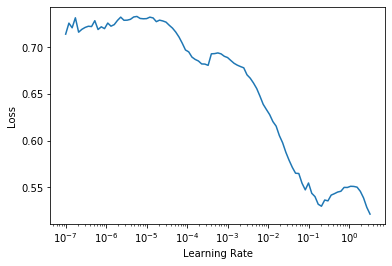

In [12]:
learn.lr_find()

In [16]:
do_fit(learn, 6, 3e-2)
learn.save(f'runs/{name}-1')

epoch,train_loss,valid_loss,accuracy_multi,accuracy_any,time
0,0.264286,0.581803,0.849274,0.629506,17:11
1,0.315618,0.395358,0.864380,0.678294,17:39
2,0.330628,0.322674,0.875037,0.755476,19:04
3,0.342265,0.320612,0.876559,0.760164,19:05
4,0.323248,0.318639,0.877094,0.754734,18:57
5,0.287194,0.293193,0.887401,0.791683,19:13


In [17]:
do_fit(learn, 8, 1e-2)
learn.save(f'runs/{name}-2')

KeyboardInterrupt: 

In [15]:
# OLD model with wrong split
do_fit(learn, 20, 3e-2)
learn.save(f'runs/{name}-1')

epoch,train_loss,valid_loss,accuracy_multi,accuracy_any,time
0,0.199542,0.226810,0.921796,0.869681,16:49
1,0.244871,0.351508,0.895710,0.766805,16:10
2,0.235130,0.469860,0.866218,0.767920,16:16
3,0.290569,0.365121,0.869017,0.684917,16:10
4,0.275412,0.270910,0.896105,0.802325,16:05
5,0.265006,0.438188,0.866922,0.672885,16:11
6,0.263249,0.254976,0.903770,0.821623,16:12
7,0.258602,0.259598,0.902165,0.826321,16:13
8,0.249462,0.264342,0.900796,0.821522,16:23
9,0.248955,0.259794,0.905517,0.839738,16:03
